## Lab 2.8
In this assignment, I'll learn how to filter and subset data in order to prepare datasets for meaningful visualizations. I'll apply various filtering techniques and create visualizations using Python, Pandas, and Matplotlib/Seaborn to analyze trends, patterns, and relationships within the data.

### Examining the Dataset
#### Loading Dataset

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_csv('data/Titanic-Dataset.csv')

df = pd.DataFrame(data)

print(df.head(5))

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


#### Displaying basic information

In [2]:
print("Datatypes:\n")
print(df.info())

print("\n", df.describe())

Datatypes:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None

        PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353

#### Filter data by condition

In [3]:
first_class_passengers = df[df['Pclass'] == 3]
print("Filtered rows to identify only first class passengers:\m", first_class_passengers)

Filtered rows to identify only first class passengers:\m      PassengerId  Survived  Pclass                                      Name  \
0              1         0       3                   Braund, Mr. Owen Harris   
2              3         1       3                    Heikkinen, Miss. Laina   
4              5         0       3                  Allen, Mr. William Henry   
5              6         0       3                          Moran, Mr. James   
7              8         0       3            Palsson, Master. Gosta Leonard   
..           ...       ...     ...                                       ...   
882          883         0       3              Dahlberg, Miss. Gerda Ulrika   
884          885         0       3                    Sutehall, Mr. Henry Jr   
885          886         0       3      Rice, Mrs. William (Margaret Norton)   
888          889         0       3  Johnston, Miss. Catherine Helen "Carrie"   
890          891         0       3                       Dooley

#### Subset data based on multiple conditions

In [4]:
women_who_survived = df[(df['Sex'] == 'female') & (df['Survived'] == 1)]
print("Women who survived:\n", women_who_survived)

Women who survived:
      PassengerId  Survived  Pclass  \
1              2         1       1   
2              3         1       3   
3              4         1       1   
8              9         1       3   
9             10         1       2   
..           ...       ...     ...   
874          875         1       2   
875          876         1       3   
879          880         1       1   
880          881         1       2   
887          888         1       1   

                                                  Name     Sex   Age  SibSp  \
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
8    Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)  female  27.0      0   
9                  Nasser, Mrs. Nicholas (Adele Achem)  female  14.0      1   
..                                              

#### Subset by columns

In [5]:
subset_name_and_age = df[['Name', 'Age']]
print("Filtered rows by Name and Age", subset_name_and_age)

Filtered rows by Name and Age                                                   Name   Age
0                              Braund, Mr. Owen Harris  22.0
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  38.0
2                               Heikkinen, Miss. Laina  26.0
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  35.0
4                             Allen, Mr. William Henry  35.0
..                                                 ...   ...
886                              Montvila, Rev. Juozas  27.0
887                       Graham, Miss. Margaret Edith  19.0
888           Johnston, Miss. Catherine Helen "Carrie"   NaN
889                              Behr, Mr. Karl Howell  26.0
890                                Dooley, Mr. Patrick  32.0

[891 rows x 2 columns]


### Data Visualization
#### Visualization of Filtered Data

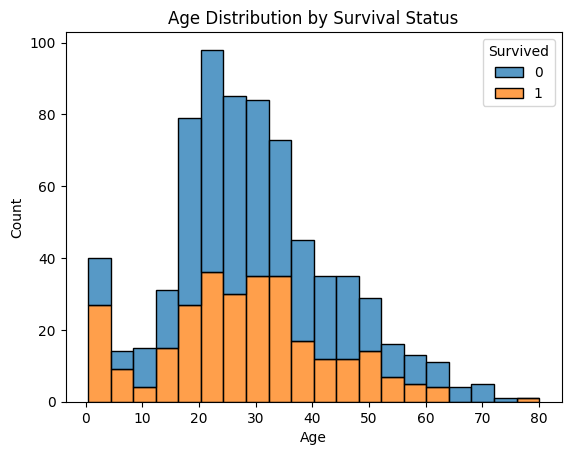

In [6]:
sns.histplot(data=df, x='Age', hue='Survived', multiple='stack')
plt.title("Age Distribution by Survival Status")
plt.show()

#### Visualization of Subsets Based on Categorical Variables

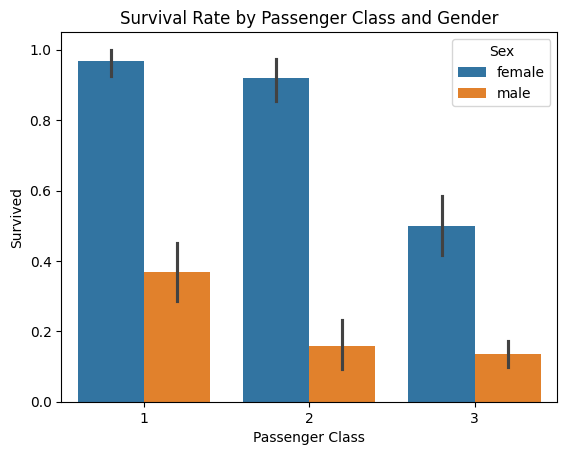

In [7]:
sns.barplot(data=df, x='Pclass', y='Survived', hue='Sex')
plt.title("Survival Rate by Passenger Class and Gender")
plt.xlabel("Passenger Class")
plt.show()

#### Exploring relationships with a Scatter Plot

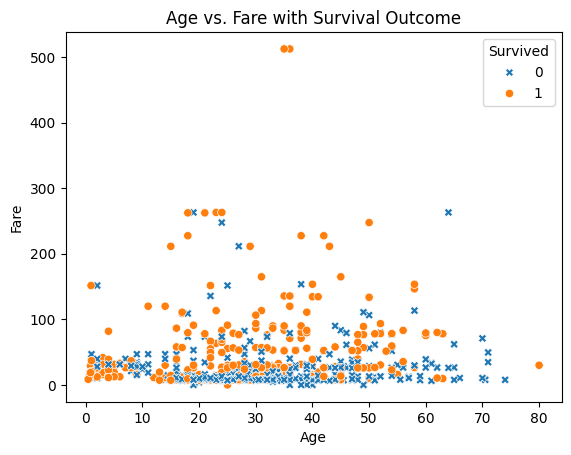

In [8]:

markers = ['X', 'o']
sns.scatterplot(data=df, x=df['Age'], y=df['Fare'], hue=df['Survived'], style=df['Survived'], markers=markers)
plt.title("Age vs. Fare with Survival Outcome")
plt.show()

### Advanced Filtering
#### Applying advanced filtering using functions

/tmp/ipykernel_56042/3806028854.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  children['Group'] = 'Children'
/tmp/ipykernel_56042/3806028854.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  seniors['Group'] = 'Seniors'


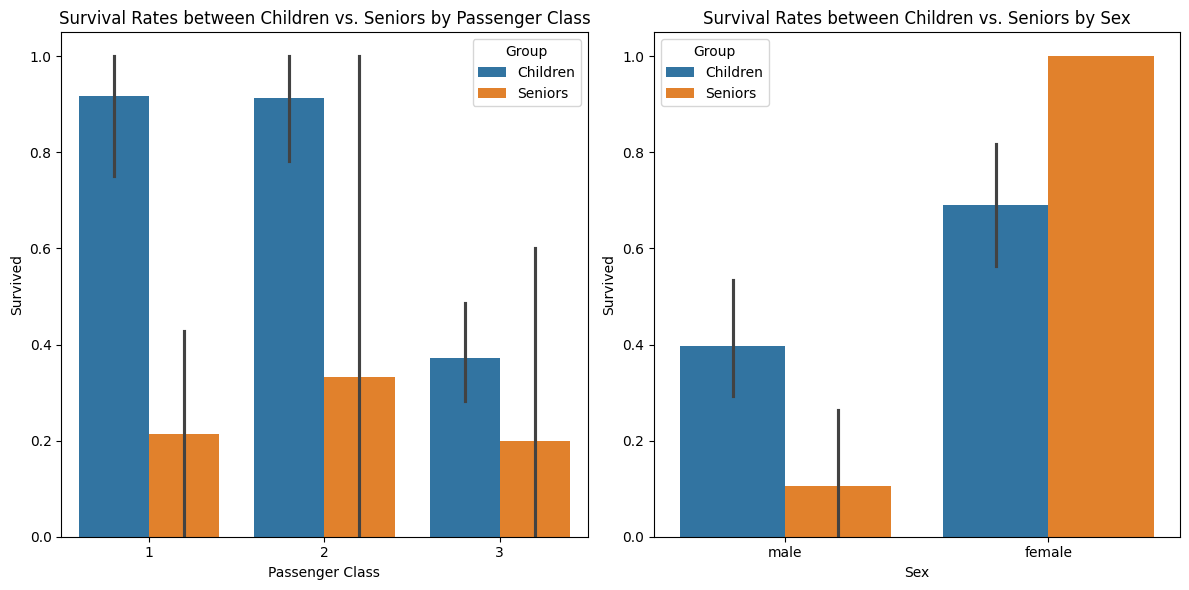

In [9]:
# comparing survival rates between people under 18 (children) from different ticket classes

# defining filtered groups
children = df[df['Age'] < 18]
seniors = df[df['Age'] > 60]

# New column to distinguish between child or senior
children['Group'] = 'Children'
seniors['Group'] = 'Seniors'

# group them together
combined_age_groups = pd.concat([children, seniors])

fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# visualize new dataframe
sns.barplot(data=combined_age_groups, x='Pclass', y='Survived', hue='Group', ax=axs[0])
axs[0].set_title("Survival Rates between Children vs. Seniors by Passenger Class")
axs[0].set_xlabel("Passenger Class")

sns.barplot(data=combined_age_groups, x='Sex', y='Survived', hue='Group', ax=axs[1])
axs[1].set_title("Survival Rates between Children vs. Seniors by Sex")

plt.tight_layout()
plt.show()

#### Interpretation & Analysis

I isolated persons under 18 (children) and persons above 60 (seniors) into their own dataframes, created a new column to identify which group they belonged to, then concatenated them into a new dataframe to visualize as a bar graph.

The first bar graph shows us the survival rate between children and seniors in different ticket classes. For children, 1st and 2nd class are virtually identical; but 3rd class children survived at a much lower rate. In comparison, seniors in first class didn't survive more than in the other classes, 2nd class having the most surviving seniors.

The second bar graph shows us the survival rate between male and female children & seniors. The difference here is dramatic - female children and seniors had a much higher survival rate than their male counterparts. Moreover, male seniors survived the least, followed by male children, then female children, and lastly female seniors survived at the highest rate.

We saw in an earlier graph that women had a higher survival rate than men, likely due to the putting women and children being prioritized on rescue boats aboard the Titanic. If that truly did happen, it makes sense that across the board children were more likely to survive than seniors. This makes female seniors' survival rate interesting, since they only had "half" the priority of a female child (female but not a child vs. female and a child), but survived at a significantly higher rate.

In the heat of the moment and panic, it's easy to understand a rule like, "women and children first" wouldn't be followed to a tee, and that were other factors at play, like who got to the rescue boats first, where each passenger was at moment of impact, etc.